# Model Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.externals import joblib
from IPython.display import display

%matplotlib inline 
pd.options.display.precision = 4
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)

### Read in your pickled dataframes from Notebook 1

In [2]:
#  data
features = pd.DataFrame(pd.read_pickle('../pickled/pickled_features'))
target = pd.DataFrame(pd.read_pickle('../pickled/pickled_target'))

# deskewed data
features_deskewed = pd.DataFrame(pd.read_pickle('../pickled/pickled_features_deskewed_scaled_w_Alpha'))
target_deskewed = pd.DataFrame(pd.read_pickle('../pickled/pickled_target_deskewed_scaled_w_Alpha'))


scaler_pickle = '../pickled/pickle_scaler.sav'
pca_pickle='../pickled/pickle_pca.sav'
gs_knc_pickle = '../pickled/pickle_gs_knc.sav'
scaler = joblib.load(scaler_pickle) 
pca = joblib.load(pca_pickle) 
gs_knc = joblib.load(pca_pickle) 

/opt/conda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator StandardScaler from version 0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator PCA from version 0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
features.head(5)

,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,enclosedporch,firstflrsf,garagearea,garageyrblt,grlivarea,lotarea,lotfrontage,...,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,utilities_AllPub,utilities_NoSeWa,yrsold_2006,yrsold_2007,yrsold_2008,yrsold_2009,yrsold_2010
id,,,,,,,,,,,,,,,,,,,,,
1,706.0,0.0,150.0,0.0,856.0,548.0,2003.0,1710.0,8450.0,65.0000,...,0,0,0,1,0,0,0,1,0,0
4,216.0,0.0,540.0,272.0,961.0,642.0,1998.0,1717.0,9550.0,60.0000,...,0,0,0,1,0,1,0,0,0,0
5,655.0,0.0,490.0,0.0,1145.0,836.0,2000.0,2198.0,14260.0,84.0000,...,0,0,0,1,0,0,0,1,0,0
7,1369.0,0.0,317.0,0.0,1694.0,636.0,2004.0,1694.0,10084.0,75.0000,...,0,0,0,1,0,0,1,0,0,0
8,859.0,32.0,216.0,228.0,1107.0,484.0,1973.0,2090.0,10382.0,70.3679,...,0,0,0,1,0,0,0,0,1,0


In [4]:
target['saleprice'].dtype

dtype('float64')

### One-Hot Encode Categorical Variables

In [5]:
features.head(5)

,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,enclosedporch,firstflrsf,garagearea,garageyrblt,grlivarea,lotarea,lotfrontage,...,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,utilities_AllPub,utilities_NoSeWa,yrsold_2006,yrsold_2007,yrsold_2008,yrsold_2009,yrsold_2010
id,,,,,,,,,,,,,,,,,,,,,
1,706.0,0.0,150.0,0.0,856.0,548.0,2003.0,1710.0,8450.0,65.0000,...,0,0,0,1,0,0,0,1,0,0
4,216.0,0.0,540.0,272.0,961.0,642.0,1998.0,1717.0,9550.0,60.0000,...,0,0,0,1,0,1,0,0,0,0
5,655.0,0.0,490.0,0.0,1145.0,836.0,2000.0,2198.0,14260.0,84.0000,...,0,0,0,1,0,0,0,1,0,0
7,1369.0,0.0,317.0,0.0,1694.0,636.0,2004.0,1694.0,10084.0,75.0000,...,0,0,0,1,0,0,1,0,0,0
8,859.0,32.0,216.0,228.0,1107.0,484.0,1973.0,2090.0,10382.0,70.3679,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features_deskewed.head()

,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,enclosedporch,firstflrsf,grlivarea,lotarea,lotfrontage,lowqualfinsf,masvnrarea,...,totrmsabvgrd_10,totrmsabvgrd_11,totrmsabvgrd_12,utilities_AllPub,utilities_NoSeWa,yrsold_2006,yrsold_2007,yrsold_2008,yrsold_2009,yrsold_2010
id,,,,,,,,,,,,,,,,,,,,,
1,6.8320,0.6931,6.2461,0.6931,6.7310,7.5005,9.0677,4.7362,0.6931,5.2883,...,0,0,0,1,0,0,0,1,0,0
4,6.0799,0.6931,6.8090,5.6131,6.8491,7.5044,9.1872,4.6913,0.6931,0.6931,...,0,0,0,1,0,1,0,0,0,0
5,6.7754,0.6931,6.7523,0.6931,7.0273,7.7394,9.5806,4.8903,0.6931,5.8636,...,0,0,0,1,0,0,0,1,0,0
7,7.3715,0.6931,6.5265,0.6931,7.4242,7.4916,9.2404,4.8203,0.6931,5.2364,...,0,0,0,1,0,0,1,0,0,0
8,6.9847,3.5264,6.3665,5.4381,6.9930,7.6912,9.2689,4.7822,0.6931,5.4889,...,0,0,0,1,0,0,0,0,1,0


# Model Selection

Next, you will build a series of models. 

## Option 1:

Pull in your deskewed pickle from notebook 1

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model

Two for Prediction:
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

## Option 2:

Get a dataframe that has not yet been deskewed.

Two for Benchmarking:
1. a KNN Model
1. a Tree-like Model
1. (optional) use a Dummy Regressor

Four for Prediction:
1. a deskewed, scaled Grid-Searched KNN
1. a deskewed, scaled Tree-like Model
1. a scaled Grid-Searched KNN
1. a scaled Tree-like Model

Calculate Mean Test Scores on each the benchmarking and prediction models and present an analysis on these models. 

<div style="float: left">
<img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUChOTsxJVdC1U1D39vNTUDa0UojJCwaJpQAZAc6O6taYioxAihTgqtyLMlN0g1MTi5IzgHygCjQ9IUWpqbo5mdmpCsrG-HSC1AG11gIABDUwYQ" width=380px style="float: left"><img src="http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUEhJLc5OLVfQtVMoTk7MSbUGCoEZIBF1bz8_BWUTK4WYPBewstQUhWCQZApQJMDZUR2LalMU1Qjl7kWZKbrBqYlFyRlAPlApmuaQotRU3ZzM7FQFZTOijABpAJpRCwCkXUAJ" width=500px style="float: left">
</div>

Use this template:

        gs_params = {}
        model_1 = GridSearchCV(ModelClass(), cv=5,
                               param_grid=gs_params)
        model_1.fit(X_set, y_train)
        display(pd.DataFrame(model_1.cv_results_))
        print(model_1.cv_results_['mean_test_score'])

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def split(feature, target, test_size=.3, random_state = 42):
    X_train, X_test, y_train, y_test = train_test_split(feature,target,
                                                   test_size = test_size,
                                                   random_state = random_state)
    data_dict = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
    }
    return data_dict


def transform(data_dict, transformer = StandardScaler()):
    feature=data_dict.copy()
    feature['X_train']=transformer.fit_transform(feature['X_train'])
    feature['X_test']=transformer.transform(feature['X_test'])
    
    try:
        feature['transformer'].append(transformer)
    except:
        feature['transformer']=[transformer]
    return feature   

def fit_and_score(data_dict,model):
    d=data_dict.copy()
    model.fit(d['X_train'],d['y_train'])
    train_score=model.score(d['X_train'],d['y_train'])
    test_score=model.score(d['X_test'],d['y_test'])
    try:
        d['cv_results'] = model.cv_results_
        d['best_estimator'] = model.best_estimator_
    except:
        pass
    
    d['model']=model
    d['train_score']= train_score
    d['test_score']=test_score
    
    return d

# Option 2:
### Benchmarking Model #1   KNearNeighbor

In [8]:
split_data = split(features, target)
scaled_data = transform(split_data)
pca_data=transform(scaled_data, PCA(n_components = 170))
#print(pca_data['transformer'])
knr_results = fit_and_score(scaled_data,KNeighborsRegressor())

print('Benchmark Train Score for KNN:', knr_results['train_score'])
print('Benchmark Test Score for KNN:', knr_results['test_score'])


print('\033[1;35;30m Model:  \n', knr_results['model'])

Benchmark Train Score for KNN: 0.811241175712
Benchmark Test Score for KNN: 0.714523733217
 Model:  
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


### Benchmarking Model #2 Decision Tree Regressor

In [9]:
split_data = split(features, target)
scaled_data =transform(split_data)
dtr_results = fit_and_score(scaled_data,DecisionTreeRegressor())
print('Benchmark Train Score for DTR:', dtr_results['train_score'])
print('Benchmark Test Score for DTR:', dtr_results['test_score'])
print('\033[1;35;30m Model:  \n', dtr_results['model'])

Benchmark Train Score for DTR: 1.0
Benchmark Test Score for DTR: 0.719577981527
 Model:  
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [10]:
split_data = split(features, target)
scaled_data =transform(split_data)
rfr_results = fit_and_score(scaled_data,RandomForestRegressor())
print('Benchmark Train Score for RFR:', rfr_results['train_score'])
print('Benchmark Test Score for RFR:', rfr_results['test_score'])
print('\033[1;35;30m Model:  \n', rfr_results['model'])

Benchmark Train Score for RFR: 0.965876024698
Benchmark Test Score for RFR: 0.886484669751
 Model:  
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


#### Benchmarking Model#3 Dummy Regressor

In [11]:
split_data = split(features, target)
scaled_data =transform(split_data)
dummy = DummyRegressor().fit(scaled_data['X_train'],scaled_data['y_train'])
dummy_predict_learn = dummy.predict(split_data['X_test'])
print('Train Score for Dummy Regressor:',dummy.score(scaled_data['X_train'],scaled_data['y_train']))
print('Train Score for Dummy Regressor:',dummy.score(scaled_data['X_test'],scaled_data['y_test']))

Train Score for Dummy Regressor: 0.0
Train Score for Dummy Regressor: -0.00048576122892


### Prediction #1 Deskewed Scaled GridSearch KNN Regressor

In [12]:
split_data = split(features_deskewed, target_deskewed)
scaled_data = transform(split_data)

knr_params={
    'n_neighbors': list(range(1,21,2))
}
gs_knr=GridSearchCV(KNeighborsRegressor(),param_grid=knr_params,
                                                      cv=5,
                                                      n_jobs=-1)

gs_knr_results = fit_and_score(scaled_data,gs_knr)
print('Benchmark Train_Score for KNN:', knr_results['train_score'])
print('Benchmark Test_Score for KNN:', knr_results['test_score'])
print('Train_Score:', gs_knr_results['train_score'])
print('Test_Score:', gs_knr_results['test_score'])
print('\033[1;36;30m Best Estimater for GS_KNR:  \n', gs_knr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_knr_results['model'])


Benchmark Train_Score for KNN: 0.811241175712
Benchmark Test_Score for KNN: 0.714523733217
Train_Score: 0.779555956221
Test_Score: 0.697085783542
 Best Estimater for GS_KNR:  
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


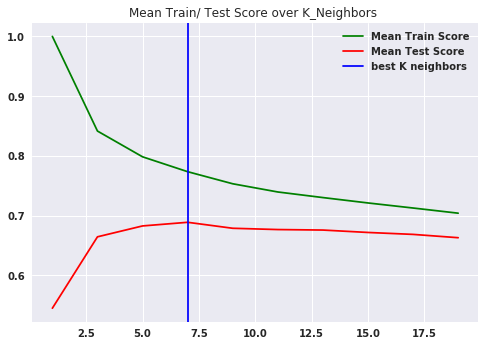

In [13]:
g = pd.DataFrame(gs_knr_results['cv_results'])
plt.plot(g['param_n_neighbors'],g['mean_train_score'], c='g',label='Mean Train Score')
plt.plot(g['param_n_neighbors'],g['mean_test_score'], c='r',label='Mean Test Score')
plt.axvline(gs_knr_results['best_estimator'].n_neighbors,c='b',label='best K neighbors')
plt.title('Mean Train/ Test Score over K_Neighbors ')
plt.legend()

### Prediction #2 Deskewed Scaled GridSearch Decision Tree Regressor

In [14]:
split_data = split(features_deskewed, target_deskewed)
scaled_data = transform(split_data)

dtr_params={
     
    'max_depth':list(range(3,15,1)),
     'min_samples_leaf':[6,12,18,24]
    
}
gs_dtr=GridSearchCV(DecisionTreeRegressor(),param_grid=dtr_params,
                                                        cv=5,
                                                        n_jobs = -1)

gs_dtr_results = fit_and_score(scaled_data, gs_dtr)

print('Benchmark Train_Score for DTR:', dtr_results['train_score'])
print('Benchmark Test_Score for DTR:', dtr_results['test_score'])
print('Train_Score:', gs_dtr_results['train_score'])
print('Test_Score:', gs_dtr_results['test_score'])
print('\033[1;36;30m Best Estimater for GS_DTR:  \n',gs_dtr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_dtr_results['model'])

Benchmark Train_Score for DTR: 1.0
Benchmark Test_Score for DTR: 0.719577981527
Train_Score: 0.856077747934
Test_Score: 0.772713111825
 Best Estimater for GS_DTR:  
 DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=12, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [6, 12, 18, 24], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refi

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


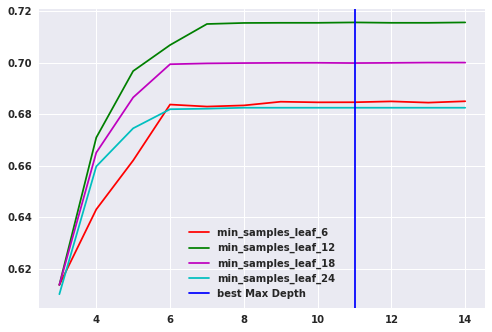

In [15]:
g = pd.DataFrame(gs_dtr_results['cv_results'])
min_samples_leaf_6 = g[g['param_min_samples_leaf'] == 6][['param_max_depth','mean_test_score']]
min_samples_leaf_12 = g[g['param_min_samples_leaf'] == 12][['param_max_depth','mean_test_score']]
min_samples_leaf_18 = g[g['param_min_samples_leaf'] == 18][['param_max_depth','mean_test_score']]
min_samples_leaf_24 = g[g['param_min_samples_leaf'] == 24][['param_max_depth','mean_test_score']]
plt.plot(min_samples_leaf_6 .values[:,0],min_samples_leaf_6 .values[:,1], c='r',label='min_samples_leaf_6 ')
plt.plot(min_samples_leaf_12.values[:,0],min_samples_leaf_12.values[:,1], c='g',label='min_samples_leaf_12')
plt.plot(min_samples_leaf_18.values[:,0],min_samples_leaf_18.values[:,1], c='m',label='min_samples_leaf_18')
plt.plot(min_samples_leaf_24.values[:,0],min_samples_leaf_24.values[:,1], c='c',label='min_samples_leaf_24')
plt.axvline(gs_dtr_results['best_estimator'].max_depth,c='b',label='best Max Depth')
plt.legend()

### Prediction #3 Scaled GridSearch KNearNeighbor Regressor

In [16]:
split_data = split(features, target)
scaled_data = transform(split_data)
knr_params={
    'n_neighbors': list(range(1,21,2))   
}

gs_knr= GridSearchCV(KNeighborsRegressor(),param_grid=knr_params,
                                                      cv=5,
                                                      n_jobs=-1)
gs_knr_results = fit_and_score(scaled_data,gs_knr
                              )
print('Benchmark Train_Score for KNN:', knr_results['train_score'])
print('Benchmark Test_Score for KNN:', knr_results['test_score'])
print('Train_Score:', gs_knr_results['train_score'])
print('Test_Score:', gs_knr_results['test_score'])

print('Mean Train Score:' ,gs_knr.cv_results_['mean_train_score'])
print('Mean Test Score:' ,gs_knr.cv_results_['mean_test_score'])

print('\033[1;36;30m Best Estimater for GS_KNR:  \n', gs_knr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_knr_results['model'])

Benchmark Train_Score for KNN: 0.811241175712
Benchmark Test_Score for KNN: 0.714523733217
Train_Score: 0.760452126038
Test_Score: 0.69101392065
Mean Train Score: [ 1.          0.85520962  0.81079131  0.78821834  0.76840419  0.75883941
  0.74979713  0.74164735  0.73260024  0.72424477]
Mean Test Score: [ 0.62431488  0.69208796  0.70086872  0.70312543  0.70304171  0.70444192
  0.70016475  0.69660361  0.69256232  0.68793335]
 Best Estimater for GS_KNR:  
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=11, p=2,
          weights='uniform')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refi

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


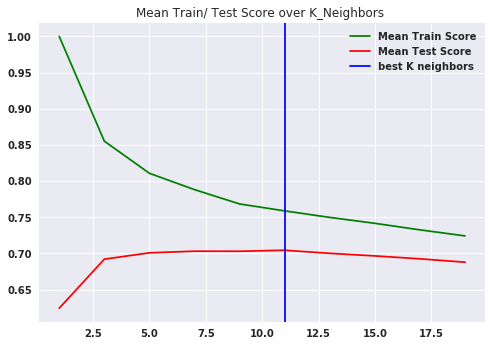

In [17]:
g = pd.DataFrame(gs_knr_results['cv_results'])
plt.plot(g['param_n_neighbors'],g['mean_train_score'], c='g',label='Mean Train Score')
plt.plot(g['param_n_neighbors'],g['mean_test_score'], c='r',label='Mean Test Score')
plt.axvline(gs_knr_results['best_estimator'].n_neighbors,c='b',label='best K neighbors')
plt.title('Mean Train/ Test Score over K_Neighbors ')
plt.legend()

### Prediction #4 Scaled GridSearch Decision Tree Regressor

In [18]:
split_data = split(features, target)
scaled_data = transform(split_data)

dtr_params={
     
     'max_depth':list(range(10,18,1)),
     'min_samples_leaf':list(range(2,8,2)),
     'min_impurity_split':[10**i for i in list(range(-4,3))],
     'min_samples_split':list(range(22,28,2))
}
gs_dtr=GridSearchCV(DecisionTreeRegressor(),param_grid=dtr_params,
                                                        cv=5,
                                                        n_jobs = -1)

gs_dtr_results = fit_and_score(scaled_data, gs_dtr)


print('Benchmark Train_Score for DTR:', dtr_results['train_score'])
print('Benchmark Test_Score for DTR:', dtr_results['test_score'])
print('Train_Score:', gs_dtr_results['train_score'])
print('Test_Score:', gs_dtr_results['test_score'])
print('\033[1;36;30m Best Estimater for GS_DTR:  \n', gs_dtr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_dtr_results['model'])

Benchmark Train_Score for DTR: 1.0
Benchmark Test_Score for DTR: 0.719577981527
Train_Score: 0.867843269389
Test_Score: 0.797280164196
 Best Estimater for GS_DTR:  
 DecisionTreeRegressor(criterion='mse', max_depth=17, max_features=None,
           max_leaf_nodes=None, min_impurity_split=0.1, min_samples_leaf=4,
           min_samples_split=24, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_impurity_split': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': [2, 4, 6], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17], 'mi

In [19]:
split_data = split(features, target)
scaled_data = transform(split_data)

dtr_params={
     
     'max_depth':list(range(10,18,1)),
     'min_samples_leaf':list(range(2,8,2)),
     'min_impurity_split':[10**i for i in list(range(-4,3))],
     'min_samples_split':list(range(22,28,2))
}
gs_dtr=GridSearchCV(DecisionTreeRegressor(),param_grid=dtr_params,
                                                        cv=5,
                                                        n_jobs = -1)

gs_dtr_results = fit_and_score(scaled_data, gs_dtr)


print('Benchmark Train_Score for DTR:', dtr_results['train_score'])
print('Benchmark Test_Score for DTR:', dtr_results['test_score'])
print('Train_Score:', gs_dtr_results['train_score'])
print('Test_Score:', gs_dtr_results['test_score'])
print('\033[1;36;30m Best Estimater for GS_DTR:  \n', gs_dtr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_dtr_results['model'])

Benchmark Train_Score for DTR: 1.0
Benchmark Test_Score for DTR: 0.719577981527
Train_Score: 0.867843269389
Test_Score: 0.797280164196
 Best Estimater for GS_DTR:  
 DecisionTreeRegressor(criterion='mse', max_depth=16, max_features=None,
           max_leaf_nodes=None, min_impurity_split=0.0001,
           min_samples_leaf=4, min_samples_split=24,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_impurity_split': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': [2, 4, 6], 'max_depth': [10, 11, 12, 13, 14, 15

In [20]:
from sklearn.externals import joblib
joblib.dump(gs_dtr_results['model'], 'gs_dtr')

['gs_dtr']

In [21]:
variable_model = joblib.load('gs_dtr')

In [22]:
variable_model

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_impurity_split': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': [2, 4, 6], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17], 'min_samples_split': [22, 24, 26]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

## Model Complexity Evaluation

1. Train a grid searched Decision Tree using a range of `max_depth`. 
1. Obtain the `cv_results_` from the `GridSearchCV` object.
1. Prepare a plot of `mean_train_score` against `max_depth` and `mean_test_score` against `max_depth` on the same plot. 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features_deskewed,target_deskewed,
                                                  test_size = .3,
                                                  random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
params = {
    'max_depth':list(range(1,32))
}
gs_dtr = GridSearchCV(DecisionTreeRegressor(random_state=13), param_grid=params, cv=5 ,n_jobs = -1)
gs_dtr.fit(X_train_scaled, y_train)
display(gs_dtr.best_estimator_)
display(pd.DataFrame(gs_dtr.cv_results_).head())
display(pd.DataFrame(gs_dtr.cv_results_).columns)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=13,
           splitter='best')

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.0045,0.0003,0.3542,0.3854,1,{'max_depth': 1},31,0.3515,0.3953,0.3115,...,0.4272,0.3743,0.2881,0.4020,0.3928,0.3825,1.8991e-03,1.8090e-05,0.0510,0.0114
1,0.0048,0.0004,0.5296,0.5719,2,{'max_depth': 2},30,0.5251,0.5814,0.5294,...,0.5524,0.5692,0.4853,0.5797,0.5557,0.5633,3.2154e-05,3.0516e-05,0.0252,0.0073
2,0.0078,0.0005,0.6159,0.7043,3,{'max_depth': 3},29,0.6242,0.6972,0.6076,...,0.6454,0.7066,0.5920,0.7283,0.6103,0.6935,3.1965e-03,1.4995e-04,0.0179,0.0128
3,0.0083,0.0005,0.6578,0.7931,4,{'max_depth': 4},3,0.6765,0.8008,0.6365,...,0.6703,0.7989,0.6218,0.8115,0.6840,0.7820,4.3926e-04,9.9742e-05,0.0243,0.0140
4,0.0084,0.0004,0.6711,0.8627,5,{'max_depth': 5},2,0.6489,0.8657,0.6471,...,0.7167,0.8717,0.6489,0.8708,0.6939,0.8606,3.0798e-04,1.7702e-05,0.0288,0.0099


Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_max_depth', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [24]:
gs_dtr.score(X_train_scaled, y_train)

0.90777779683630055

In [25]:
gs_dtr.score(X_test_scaled, y_test)

0.71100538807609492

In [26]:
gs_dtr.best_estimator_.max_depth

6

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


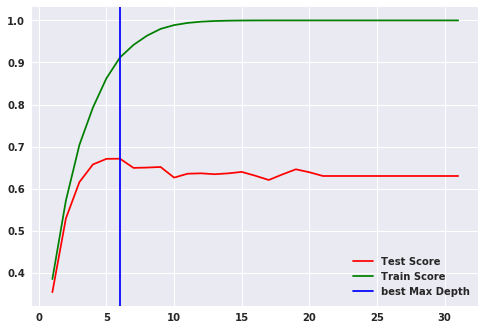

In [27]:
#Prepare a plot of mean_train_score against max_depth and mean_test_score against max_depth on the same plot.
plt.plot(gs_dtr.cv_results_['param_max_depth'], gs_dtr.cv_results_['mean_test_score'], c='r',label='Test Score')
plt.plot(gs_dtr.cv_results_['param_max_depth'], gs_dtr.cv_results_['mean_train_score'], c='g',label='Train Score')
plt.axvline(gs_dtr.best_estimator_.max_depth,c='b',label='best Max Depth')
plt.legend()

What is the grid search algorithm and when is it applicable? What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?

### <font color='blue'> ANSWER:
#### <font color='blue'> Max_depth=5 and max_depth=6 both reflect a higher mean_test_score over other parameters while a higher mean_train_score falls on to max_depth=6. Since what we really care about is the test score not the train score; to simplfied this model, I believe setting  max_depth = 5 over Decision Tree regression is sufficient for the model

### Prediction

Choose a model you have developed in this workbook that you believe will best generalize. Provide a statement here as to why you think it will generalize best. Pickle the model and upload to github along with this notebook.

#### <font color='blue'> I believe the model that  generalize data the best is a Decision Tree Regressor model over below parameters:</font>

<span style="color:blue"> ** * criterion='mse'**</span>
<br><span style="color:blue"> ** * max_depth=16**</span>
<br><span style="color:blue"> ** * max_features=None**</span>
<br><span style="color:blue"> ** * max_leaf_nodes=None**</span>
<br><span style="color:blue"> ** * min_impurity_split=10**</span>
<br><span style="color:blue"> ** * min_samples_leaf=4**</span>
<br><span style="color:blue"> ** * min_samples_split=24**</span>
<br><span style="color:blue"> ** * min_weight_fraction_leaf=0.0**</span>
<br><span style="color:blue"> ** * presort=False**</span>
<br><span style="color:blue"> ** * random_state=None**</span>
<br><span style="color:blue"> ** * splitter='best'**</span>         
<br><span style="color:blue"> ** * Train_Score: 0.867843269389**</span>
<br><span style="color:blue"> ** * Test_Score: 0.797280164196**</span>

#### <font color='blue'> After fed in both un-deskewed and deskewed data to different models,  I found using un-deskewed data over DTC model gave me a better train/test score</font>

In [28]:
print('Benchmark Train_Score for DTR:', dtr_results['train_score'])
print('Benchmark Test_Score for DTR:', dtr_results['test_score'])
print('Train_Score:', gs_dtr_results['train_score'])
print('Test_Score:', gs_dtr_results['test_score'])
print('\033[1;36;30m Best Estimater for GS_DTR:  \n', gs_dtr_results['best_estimator'])
print('\033[1;35;30m Model:  \n', gs_dtr_results['model'])

Benchmark Train_Score for DTR: 1.0
Benchmark Test_Score for DTR: 0.719577981527
Train_Score: 0.867843269389
Test_Score: 0.797280164196
 Best Estimater for GS_DTR:  
 DecisionTreeRegressor(criterion='mse', max_depth=16, max_features=None,
           max_leaf_nodes=None, min_impurity_split=0.0001,
           min_samples_leaf=4, min_samples_split=24,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
 Model:  
 GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_impurity_split': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'min_samples_leaf': [2, 4, 6], 'max_depth': [10, 11, 12, 13, 14, 15